<H2> 課題1: データ前処理の実習 </H2>
<p>データの前処理は、データ分析の全行程のうち約8割を占める重要な工程です。</p>
<p>この課題ではkaggleのcompetitionで使用されたデータを用いてデータの前処理方法を確認します。</p>
<p>各列の詳細は下記サイトをご参照ください。</p>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
<p>2章で学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [20]:
% matplotlib inline

from __future__ import print_function
import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

<H2>2. データの読み込み</H2>
<p>CSVファイル"kaggle_housing_price.csv"を読み込み、内容を確認します。</p>

In [21]:
# データ読み込み
dataset = pd.read_csv('kaggle_housing_price.csv')

In [22]:
# データを最初の5行だけ表示
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# データの行数、列数を表示
print('Number of Rows: %i   Number of Columns: %i' % dataset.shape)

Number of Rows: 1460   Number of Columns: 81


<h2>3. 要約統計量を出力する</h2>
<p> データ数、平均や中央値、標準偏差などの統計量を確認し、データへの理解を深めます。</p>

In [24]:
# 要約統計量を表示
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<H2>4. 基本的なデータの操作</H2>

データの抽出・列の分割について学びます。

<h3> インデックスを用いた行の指定</h3>

In [25]:
# インデックス番号0~10の行を抽出
dataset.iloc[0:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [26]:
# "SalePrice"と"LotArea"の列を抽出し、最初の10行だけ表示
dataset.iloc[:10][['SalePrice', 'LotArea']]

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


<h3>カラム間の演算</h3>

In [27]:
# "1stFlrSF"と"2ndFlrSF"を合計した"FlrSF_total"を新たな列として加える
dataset['FlrSF_total'] = dataset['1stFlrSF'] + dataset['2ndFlrSF']
dataset.iloc[0:9][['Id', '1stFlrSF', '2ndFlrSF', 'FlrSF_total']].head()

,Id,1stFlrSF,2ndFlrSF,FlrSF_total
0,1,856,854,1710
1,2,1262,0,1262
2,3,920,866,1786
3,4,961,756,1717
4,5,1145,1053,2198


<h3>ダミー変数の作成</h3>
<p> ダミー変数についてはテキストP.61を参照ください。</p>

In [28]:
# 列'SaleType'をダミー変数に展開します。
dataset = pd.get_dummies(data=dataset, columns=['SaleType'])

In [29]:
# ダミー変数が作成されていることを確認します　(datasetの最初の5行だけ出力)
dataset.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1262,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1717,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1


<h3>フィルタリング</h3>

In [30]:
# 'YearBuilt'が2000以降の物件のみを抽出
dataset[dataset['YearBuilt'] >= 2000].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0


In [37]:
# 'YearBuilt'が2000以降、'GarageCars'が2以上の物件を抽出
dataset[np.logical_and((dataset['YearBuilt'] >= 2000 ), (dataset['GarageCars'] >= 2))].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0


<h2>5. データの可視化</h2>

データを理解するには要約統計量や抽出したデータを確認するだけでは不十分であり、可視化が必要です。

<h3>ヒストグラム</h3>
<p>連続変数の分布を確認する際に有効</p>

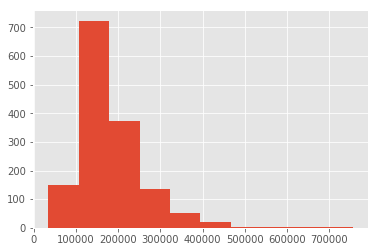

In [32]:
# datasetの'SalePrice'をヒストグラムで表示
dataset['SalePrice'].hist()

<h3>散布図</h3>
<p>2つの変数の関係性を確認する際に有効</p>

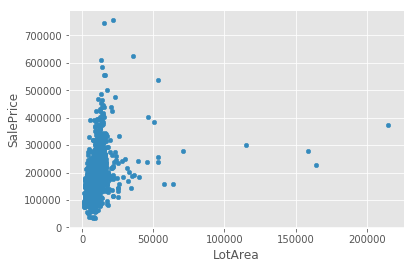

In [33]:
# datasetの'LotArea'と'SalePrice'を散布図で表示
dataset.plot(kind='scatter', x='LotArea', y='SalePrice')

<h3>棒グラフ</h3>

大小や増減を比較する際に有効

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
5        Normal
6        Normal
7        Normal
8       Abnorml
9        Normal
10       Normal
11      Partial
12       Normal
13      Partial
14       Normal
15       Normal
16       Normal
17       Normal
18       Normal
19      Abnorml
20      Partial
21       Normal
22       Normal
23       Normal
24       Normal
25       Normal
26       Normal
27       Normal
28       Normal
29       Normal
         ...   
1430     Normal
1431     Normal
1432     Normal
1433     Normal
1434     Normal
1435    Abnorml
1436     Normal
1437    Partial
1438     Normal
1439     Normal
1440     Normal
1441     Normal
1442     Normal
1443     Normal
1444     Normal
1445     Normal
1446     Normal
1447     Normal
1448     Normal
1449    Abnorml
1450     Normal
1451    Partial
1452     Normal
1453    Abnorml
1454     Normal
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Len

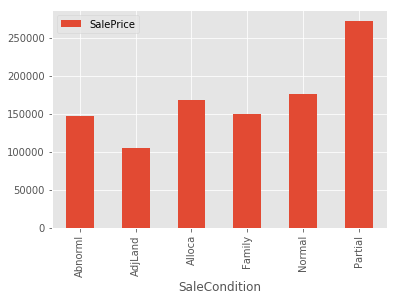

In [34]:
#datasetの'SaleCondition'ごとに、'SalePrice'の平均を棒グラフで表示
price_by_condition = \
 dataset.groupby('SaleCondition').aggregate({'SalePrice': np.mean}).reset_index()
price_by_condition.plot.bar(x='SaleCondition')

dataset['SaleCondition']

<h3>箱ヒゲ図 (Boxplot) </h3>
<p> 複数の変数の分布を比較する際に有効 （棒グラフでは平均の比較はできますが、分布全体の比較はできません)</p>

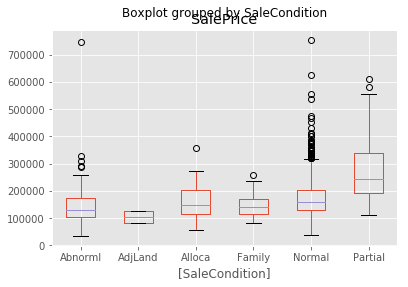

In [38]:
# datasetの'SaleCondition'ごとに'SalePrice'をboxplotで表示
dataset[['SaleCondition', 'SalePrice']].boxplot(by='SaleCondition')

<h2>6. 欠損値の確認</h2>
<p> データに欠損値があると、演算でエラーが起きる場合があります。</p>
<p>欠損値の扱いは欠損が発生した原因により異なります。（テキストP. 69参照　）<p>

In [39]:
# 列ごとに欠損値の有無を確認
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, '; # of missing record: ', missing_num)

Id ; # of missing record:  0
MSSubClass ; # of missing record:  0
MSZoning ; # of missing record:  0
LotFrontage ; # of missing record:  259
LotArea ; # of missing record:  0
Street ; # of missing record:  0
Alley ; # of missing record:  1369
LotShape ; # of missing record:  0
LandContour ; # of missing record:  0
Utilities ; # of missing record:  0
LotConfig ; # of missing record:  0
LandSlope ; # of missing record:  0
Neighborhood ; # of missing record:  0
Condition1 ; # of missing record:  0
Condition2 ; # of missing record:  0
BldgType ; # of missing record:  0
HouseStyle ; # of missing record:  0
OverallQual ; # of missing record:  0
OverallCond ; # of missing record:  0
YearBuilt ; # of missing record:  0
YearRemodAdd ; # of missing record:  0
RoofStyle ; # of missing record:  0
RoofMatl ; # of missing record:  0
Exterior1st ; # of missing record:  0
Exterior2nd ; # of missing record:  0
MasVnrType ; # of missing record:  8
MasVnrArea ; # of missing record:  8
ExterQual ; # of mi